프로젝트 개요:

학생들은 텍스트 데이터를 감성으로 분류하는 감성 분석 시스템을 개발합니다. 이 프로젝트는 전처리, 모델 선택, 학습, 평가 및 결과 시각화를 포함합니다.

프로젝트 목표 (보고서 목차)

1. 감성 분석의 기본 이해: 감성 분석이 무엇이며 그 응용에 대해 학습
2. 데이터 전처리: 머신 러닝 작업을 위해 데이터 전 처리하는 경험을 쌓음
3. 모델 선택 및 학습: 수업에서 활용한 모델을 활용해서 구현하고 그 강점과 약점을 이해
4. 평가: 적절한 지표를 사용하여 모델의 성능을 평가
5. 시각화 및 해석: 결과를 시각화하고 해석


프로젝트 구성 요소:

1. 데이터: wine_review.csv

2. 데이터 전처리: 
데이터 정리 (노이즈 제거, 결측값 처리 등)
텍스트 토큰화 및 불용어 제거
텍스트 정규화 (스테밍 또는 표제어 추출)

3. 모델 구현: 수업에서 활용한 모델을 적용

4.모델 학습 및 튜닝:
데이터셋을 학습 및 테스트 세트로 분할.
모델 학습 및 하이퍼파라미터 튜닝 (예: 그리드 서치 또는 랜덤 서치 사용)
교차 검증과 같은 기술을 사용하여 견고성 보장

5. 모델 평가:
정확도, 정밀도, 재현율, F1 점수 및 ROC-AUC와 같은 지표를 사용하여 모델 평가
오버피팅과 언더피팅을 논의하고 이를 해결하는 방법 학습

6. 시각화 및 보고:
Matplotlib 또는 Seaborn과 같은 라이브러리를 사용하여 결과 시각화
혼동 행렬 및 ROC 곡선 생성
보고서에 결과 요약


제출물:
1. 코드 저장소: 명확한 실행 지침이 포함된 문서화된 코드 (쥬피터 노트북)
2. 보고서: 데이터 전처리, 모델 구현, 결과 및 분석을 포함한 상세 보고서 (MS Word 파일)

In [9]:
#필요한 라이브러리 import
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, 
    roc_auc_score, roc_curve, auc, confusion_matrix, 
    classification_report, ConfusionMatrixDisplay
)
# 데이터 로드
df = pd.read_csv("./wine_review.csv")
# 데이터 확인
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2890 entries, 0 to 2889
Data columns (total 32 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    2890 non-null   object 
 1   asins                 870 non-null    object 
 2   brand                 2825 non-null   object 
 3   categories            2890 non-null   object 
 4   dateAdded             2890 non-null   object 
 5   dateUpdated           2890 non-null   object 
 6   descriptions          2738 non-null   object 
 7   dimension             1838 non-null   object 
 8   ean                   2166 non-null   object 
 9   flavors               151 non-null    object 
 10  keys                  2890 non-null   object 
 11  manufacturer          849 non-null    object 
 12  manufacturerNumber    2457 non-null   object 
 13  name                  2890 non-null   object 
 14  reviews.date          2552 non-null   object 
 15  reviews.dateAdded    

,id,asins,brand,categories,dateAdded,dateUpdated,descriptions,dimension,ean,flavors,...,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username,sizes,sourceURLs,upc,weight
0,AV13ClKCGV-KLJ3akN68,NaN,Gallo,"Food & Beverage,Beverages,Wine, Beer & Liquor,...",2017-07-24T23:59:11Z,2018-01-10T18:06:28Z,NaN,1.0 in x 1.0 in x 1.0 in,NaN,NaN,...,https://redsky.target.com/groot-domain-api/v1/...,This a fantastic white wine for any occasion!,My Favorite White Wine,NaN,NaN,Bjh,NaN,http://redsky.target.com/v1/plp/search?kwr=y&c...,4.9213E+11,1.0 lbs
1,AV13CsvW-jtxr-f38AQO,NaN,Fresh Craft Co.,"Food & Beverage,Beverages,Wine, Beer & Liquor,...",2017-07-24T23:59:42Z,2018-01-10T05:38:33Z,"[{""dateSeen"":[""2017-12-21T05:43:00.000Z"",""2017...",4.25 in x 4.25 in x 5.25 in,NaN,NaN,...,https://redsky.target.com/groot-domain-api/v1/...,"Tart, not sweet...very refreshing and delicious!",Yum!!,NaN,NaN,Wino,NaN,http://redsky.target.com/v1/plp/search?kwr=y&c...,83120003441,2.45 lbs
2,AV13CVI_glJLPUi8O7Po,NaN,1000 Stories,"Food & Beverage,Beverages,Wine, Beer & Liquor,...",2017-07-24T23:58:05Z,2018-01-10T05:38:31Z,NaN,3.3 in x 3.3 in x 11.79 in,NaN,NaN,...,https://redsky.target.com/groot-domain-api/v1/...,I was given this wine so it was a delightful s...,A New Favorite!,NaN,NaN,Bama Mom,NaN,http://redsky.target.com/v1/plp/search?kwr=y&c...,82896001453,3.09 lbs
3,AV13CVI_glJLPUi8O7Po,NaN,1000 Stories,"Food & Beverage,Beverages,Wine, Beer & Liquor,...",2017-07-24T23:58:05Z,2018-01-10T05:38:31Z,NaN,3.3 in x 3.3 in x 11.79 in,NaN,NaN,...,https://redsky.target.com/groot-domain-api/v1/...,This is a phenomenal wine and my new favorite ...,"Bold, Flavorful, Aromatic, Delicious",NaN,NaN,Av Dub,NaN,http://redsky.target.com/v1/plp/search?kwr=y&c...,82896001453,3.09 lbs
4,AV13CYL4-jtxr-f37_-t,NaN,Wine Cube153,"Food & Beverage,Beverages,Wine, Beer & Liquor,...",2017-07-24T23:58:18Z,2018-01-10T18:06:29Z,"[{""dateSeen"":[""2017-12-21T05:43:00.000Z"",""2017...",1.0 in x 1.0 in x 1.0 in,NaN,NaN,...,https://redsky.target.com/groot-domain-api/v1/...,4 750ml bottles for the price of two With way ...,"Yum! Plus, Environmentally Friendly!",Overland Park,NaN,Chelseamay,NaN,https://redsky.target.com/groot-domain-api/v1/...,85200600465,1.0 lbs


In [2]:
# 필요한 열만 선택
df = df[["reviews.title", "reviews.text"]]
# 리뷰 제목의 결측값을 빈 문자열로 대체
df["reviews.title"] = df["reviews.title"].fillna("")
# 중복된 리뷰 텍스트 제거
df.drop_duplicates(subset=["reviews.text"], inplace=True)
# 리뷰 텍스트의 결측값 제거
df = df.dropna(subset=["reviews.text"])

In [3]:
# NLTK 리소스 다운로드
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download("vader_lexicon")

[nltk_data] Downloading package punkt to /home/codespace/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/codespace/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /home/codespace/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/codespace/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [4]:
# 텍스트 전처리 함수
def data_preprocessing(text):
    text = text.lower()  # 소문자로 변환
    text = re.sub(r'\d+', '', text)  # 숫자 제거
    text = re.sub(r'\s+', ' ', text)  # 연속된 공백 제거
    text = re.sub(r'[^\w\s]', '', text)  # 구두점 제거
    tokens = word_tokenize(text)  # 토큰화
    # 불용어 제거
    stop_word = [word for word in tokens if word not in stopwords.words("english")]
    lemmatizer = WordNetLemmatizer()
    # 표제어 추출
    lemmatization = [lemmatizer.lemmatize(word) for word in stop_word]
    return ' '.join(lemmatization)

# 텍스트 전처리 적용
df["reviews.text"] = df["reviews.text"].apply(data_preprocessing)
df["reviews.title"] = df["reviews.title"].apply(data_preprocessing)

In [5]:
# 감성 분석
vader_sentiment = SentimentIntensityAnalyzer()
# 각 리뷰 텍스트의 감성 점수 계산
df["text_vader"] = df["reviews.text"].apply(lambda reviews: vader_sentiment.polarity_scores(reviews))
# 각 리뷰 제목의 감성 점수 계산
df["title_vader"] = df["reviews.title"].apply(lambda reviews: vader_sentiment.polarity_scores(reviews))
# 리뷰 텍스트의 복합 감성 점수 추출
df["text_compound"] = df["text_vader"].apply(lambda score_dict: score_dict["compound"])
# 리뷰 제목의 복합 감성 점수 추출
df["title_compound"] = df["title_vader"].apply(lambda score_dict: score_dict["compound"])
# 텍스트와 제목의 감성 점수 평균 계산
df["compound"] = (df["text_compound"] + df["title_compound"]) / 2
# 감성 점수를 기준으로 레이블 생성 (0.05 이상이면 긍정(1), 아니면 부정(0))
df["label"] = df["compound"].apply(lambda x: 1 if x >= 0.05 else 0)


In [23]:
# 텍스트 벡터화 및 데이터 분할
# 제목과 텍스트 결합
df["reviews"] = df["reviews.title"] + "," + df["reviews.text"]
# TF-IDF 벡터화
vectorizer = TfidfVectorizer(max_features=1000)
x = vectorizer.fit_transform(df["reviews"])
y = df["label"]

# 학습 및 테스트 세트로 분할
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# 모델 학습 및 하이퍼파라미터 튜닝
model = LogisticRegression()
# 하이퍼파라미터 그리드 설정
param_grid = {'C': [0.01, 0.1, 1, 10, 100]}
# 그리드 서치
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(x_train, y_train)

# 최적 모델 선택
best_model = grid_search.best_estimator_

# 모델 평가
y_pred = best_model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
test_roc_auc = roc_auc_score(y_test, best_model.predict_proba(x_test)[:, 1])
#정확도(전체 예측 중 올바르게 예측한 비율)
print(f"Accuracy: {accuracy:.2f}")
#정밀도(양성 예측 중 실제 양성인 비율)
print(f"Precision: {precision:.2f}")
#재현율(실제 양성 중 올바르게 예측한 비율)
print(f"Recall: {recall:.2f}")
#F1 점수(정밀도와 재현율의 조화 평균)
print(f"F1 Score: {f1:.2f}")
#ROC-AUC(ROC 곡선 아래의 면적으로 모델 분류의 성능을 나타냄)
print(f"ROC AUC: {test_roc_auc:.2f}")

Accuracy: 0.88
Precision: 0.91
Recall: 0.96
F1 Score: 0.93
ROC AUC: 0.87


각각의 항목 설명
정확도 (Accuracy): 모델이 정확히 예측한 비율

정밀도 (Precision): 모델이 Positive로 예측한 것 중에서 실제 Positive인 비율

재현율 (Recall): 실제 Positive인 것 중에서 모델이 Positive로 예측한 비율. 

F1 score: 모델의 정밀도(Precision)와 재현율(Recall)의 조화 평균을 나타내는 지표

ROC-AUC : ROC곡선 아래의 면적을 의미하며, 이는 모델의 분류 성능을 나타내는 지표 중 하나

정확도, 정밀도, 재현율, F1점수, ROC-AUC를 봤을 때 전체적으로 수치가 높게 형성 돼있어 모델이 예측하고 분류하는 성능은 준수한 편으로 보인다.


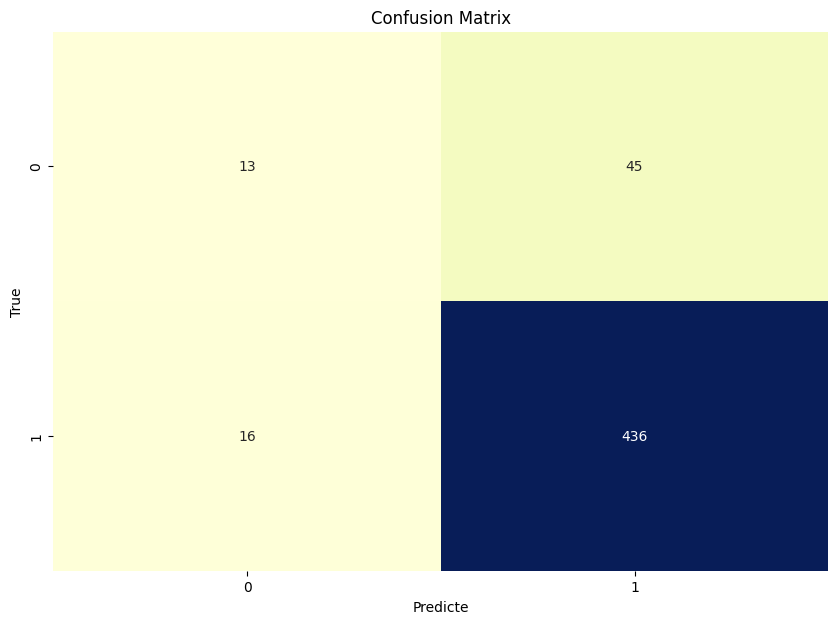

In [24]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt="d", cmap="YlGnBu", cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicte")
plt.ylabel("True")
plt.show()

위의 혼동 행렬을 보고 분석할 수 있는 내용은 아래와 같다.

• 436명이 실제로 Positive이고 모델이 이를 정확히 Positive로 예측함. (True Positive).

• 16명이 실제로 Positive이지만 모델이 이들을 Negative로 잘못 예측함. (False negative).

• 13명이 실제로 Negative이고 모델이 이를 정확히 Negative로 예측함. (True Negative).

• 45명이 실제로 Negative이지만 모델이 이들을 Positive로 잘못 예측함. (False Positive).

 TP = 436
 FN = 16
 TN = 13
 FP = 45





• 정확도 (Accuracy): 모델이 정확히 예측한 비율. 

Accuracy = TP+TN/TP+TN+FP+FN = 436+13/436+13+45+16 = 약0.88

• 정밀도 (Precision): 모델이 Positive로 예측한 것 중에서 실제 Positive인 비율

Precision = TP/TP+FP = 436/436+45 = 약0.91

• 재현율 (Recall): 실제 Positive인 것 중에서 모델이 Positive로 예측한 비율.

Recall = TP/TP+FN = 436/436+16 = 약0.96

F1 score: 모델의 정밀도(Precision)와 재현율(Recall)의 조화 평균을 나타내는 지표

F1 score = 2×(정밀도*재현율)/(정밀도+재현율) = 약 0.93임을 계산할 수 있다.


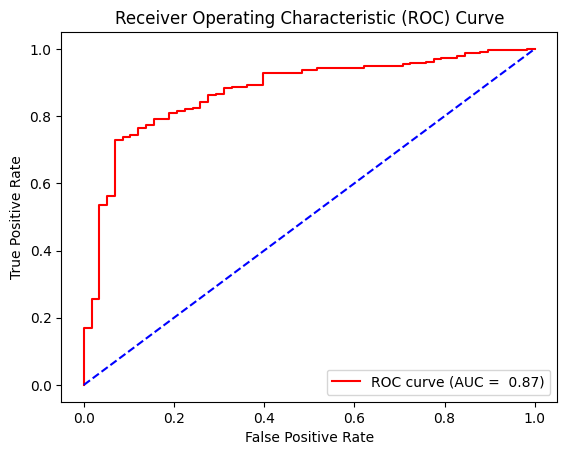

In [25]:
# ROC 곡선
fpr, tpr, _ = roc_curve(y_test, best_model.decision_function(x_test))
roc_display = auc(fpr, tpr)
plt.plot(fpr, tpr, linestyle = '-', color = 'red',label=f"ROC curve (AUC =  {roc_display:.2f})")
plt.plot([0, 1], [0, 1], 'b--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc="lower right")
plt.show()

ROC곡선의 AUC(곡선 아래 면적)은 0.5~1의 값을 갖고 1에 가까울수록 분류 성능이 높음을 나타낸다. 해당 모델은 ROC-AUC가 0.87로 분류 성능이 준수한 것을 확인할 수 있다.